<a href="https://colab.research.google.com/github/Trizzole/HelloAI/blob/main/Assignment5_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!cat ~/.keras/keras.json
!git clone "https://github.com/kartoone/nn3"
!cat nn3/keras.json > ~/.keras/keras.json
!pip uninstall -y keras
!pip uninstall -y tensorflow
!pip install tensorflow==2.2
!pip install keras==2.2.4
!pip install pydot-ng
!pip install theano==0.8
%cd nn3/src


Cloning into 'nn3'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 174 (delta 35), reused 26 (delta 11), pack-reused 109
Receiving objects: 100% (174/174), 94.37 MiB | 20.34 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Updating files: 100% (107/107), done.
Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Successfully uninstalled keras-2.11.0
Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10

In [ ]:
!cat ~/.keras/keras.json


{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "theano",
    "image_dim_ordering": "th",
    "image_data_format": "channels_first"
}


In [ ]:
import network3
from network3 import Network
from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
training_data, validation_data, test_data = network3.load_data_shared()
mini_batch_size = 10
net = Network([
        FullyConnectedLayer(n_in=784, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, 60, mini_batch_size, 0.1, validation_data, test_data)


Trying to run under a GPU.  If this is not desired, then modify network3.py
to set the GPU flag to False.


WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 0.9245
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9187000000000002
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 0.9448000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9397000000000002
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 0.955
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9497000000000002
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000


25 0.51716435
3


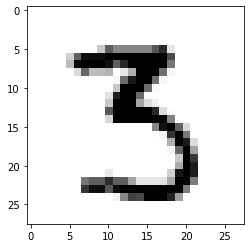

In [ ]:
import matplotlib.pyplot as plt


(worsti, worsta) = findTroubleSomeImage(net, test_data)
print(worsti, worsta)
print(test_data[1][270].eval())
pixel_data = test_data[0][270].reshape((28,28)).eval()
pixel_data = [pix*255 for pix in pixel_data]
#print(pixel_data)
net.test_mb_outputs(0)
#print(test_data[1][1].eval())
net.test_mb_outputs(0)
plt.figure()
plt.imshow(pixel_data, cmap="gray_r")


In [ ]:
# assume batch size of 10
import numpy as np
def findTroubleSomeImage(net, test_data, batchsize=10):
  batches = int(len(test_data[0][8].eval())/batchsize)
  worsta = 1.0
  worsti = 0
  for i in range(batches):
    output = net.test_mb_outputs(i)
    for a in output:
      if np.max(a) < worsta:
        worsta = np.max(a)
        worsti = i
  return(worsti, worsta)

In [ ]:
!pip show theano

Name: Theano
Version: 0.8.0
Summary: Optimizing compiler for evaluating mathematical expressions on CPUs and GPUs.
Home-page: http://deeplearning.net/software/theano/
Author: LISA laboratory, University of Montreal
Author-email: theano-dev@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: numpy, scipy, six
Required-by: 


In [ ]:
import network3
from network3 import Network
from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
training_data, validation_data, test_data = network3.load_data_shared()
mini_batch_size = 10

import time

net = Network([
  ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
              filter_shape=(3, 1, 5, 5), 
              poolsize=(2, 2)),
  #FullyConnectedLayer(n_in=20*12*12, n_out=100),
  SoftmaxLayer(n_in=3*12*12, n_out=10)], mini_batch_size)
start = time.time()
net.SGD(training_data, 60, mini_batch_size, 0.1, 
    validation_data, test_data)   
finish = time.time()
elapsed = finish - start
print(elapsed/60 + " minutes")

Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 0.9489000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9466000000000001
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 0.9619000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9603
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 0.9667
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9661000000000002
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000

In [ ]:
import network3
from network3 import Network
from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
training_data, validation_data, test_data = network3.load_data_shared()
mini_batch_size = 10

import time

net = Network([
  ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
              filter_shape=(20, 1, 5, 5), 
              poolsize=(2, 2)),
  FullyConnectedLayer(n_in=20*12*12, n_out=100),
  SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
start = time.time()
net.SGD(training_data, 60, mini_batch_size, 0.1, 
    validation_data, test_data)   
finish = time.time()
elapsed = finish - start
print(elapsed)
print(str(elapsed/60) + " minutes")


Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 0.9374000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9326000000000001
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 0.9582
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9583000000000002
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 0.9675000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9692000000000001
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch 

TypeError: ignored